In [30]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
import random
import sys
from scipy.spatial import distance
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1
import matplotlib.pyplot as plt



LARGER_DISTANCE = sys.maxsize
TALK = True # TALK = True, imprime resultados parciales

In [31]:
numericalDF = pd.read_csv('numericalData.csv')
columnas = ['directores','criticas','duracion','genero','actores1','actores2','actores3','rostros',
            'scores','gross','budget']
del numericalDF['Unnamed: 0']

for i in columnas:
    numericalDF.loc[numericalDF[i] == 0, i] = numericalDF[i].mean()
X = numericalDF.head(20)
numericalDF.head()

,directores,criticas,duracion,genero,actores1,actores2,actores3,rostros,scores,gross,budget
0,1877.0,43.0,90.0,6.0,2097.0,3032.0,3522.0,1.368745,6.6,8.522200e+04,1.100000e+03
1,2398.0,14.0,100.0,9.0,946.0,79.0,3521.0,5.000000,6.3,1.044300e+04,3.570019e+07
2,2397.0,13.0,76.0,14.0,2096.0,3031.0,3520.0,1.368745,6.3,3.968876e+07,1.400000e+03
3,114.0,43.0,43.0,17.0,2095.0,3030.0,3519.0,1.000000,7.5,3.968876e+07,3.570019e+07
4,2396.0,1.0,87.0,9.0,1507.0,3029.0,866.0,2.000000,7.7,3.968876e+07,3.570019e+07


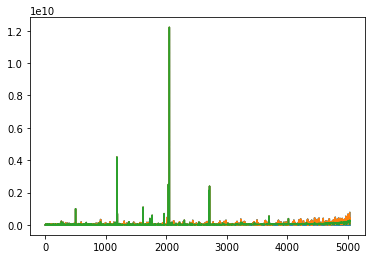

In [34]:
DATA_SET = numericalDF.values
DATA_LEN = len(DATA_SET)
plt.plot(DATA_SET)
plt.show()
class DataPoint:
    def __init__(self, p):
        self.value = p[:]
        
    def set_value(self, p):
        self.value = p
    
    def get_value(self):
        return self.value
    
    def set_cluster(self, cluster):
        self.cluster = cluster
    
    def get_cluster(self):
        return self.cluster

data = []
def initialize_dataset():
    for i in range(DATA_LEN):
        point = DataPoint(DATA_SET[i])
        point.set_cluster(None)
        data.append(point)
    return
initialize_dataset()
NUM_CLUSTERS = 3

In [26]:
SAMPLING_METHOD = 1 

centroids = []
def initialize_centroids():
    if (TALK) : 
        print("Centroides inicializados en:")
    for c in range(NUM_CLUSTERS):
        if (SAMPLING_METHOD == 0) :
            which = random.randint(0,DATA_LEN-1)
        elif (SAMPLING_METHOD == 1):
            which = c
        else :
            which = DATA_LEN-1 - c
                
        centroids.append(list(DATA_SET[which]))
        if (TALK) : 
            print(centroids[c])        
    if (TALK) : 
        print()
    
    return

# --------------------------
# Inicializar los centroides
initialize_centroids()

Centroides inicializados en:
[1877.0, 43.0, 90.0, 6.0, 2097.0, 3032.0, 3522.0, 1.3687450357426529, 6.5999999999999996, 85222.0, 1100.0]
[2398.0, 14.0, 100.0, 9.0, 946.0, 79.0, 3521.0, 5.0, 6.2999999999999998, 10443.0, 35700193.726370133]
[2397.0, 13.0, 76.0, 14.0, 2096.0, 3031.0, 3520.0, 1.3687450357426529, 6.2999999999999998, 39688758.894360602, 1400.0]



In [27]:
def update_clusters():
    changed = False
    
    for i in range(DATA_LEN):
        minDistance = LARGER_DISTANCE
        currentCluster = 0
        
        for j in range(NUM_CLUSTERS):
            dist = distance.euclidean(data[i].get_value(), centroids[j])
            if(dist < minDistance):
                minDistance = dist
                currentCluster = j
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            changed = True
            
    members = [0] * NUM_CLUSTERS
    for i in range(DATA_LEN):
        members[data[i].get_cluster()] += 1
    
    if (TALK) : 
        for j in range(NUM_CLUSTERS):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
            
    return changed

# --------------------------
# Actualizar los clusters
KEEP_WALKING = update_clusters()

El cluster  0  incluye  1076 miembros.
El cluster  1  incluye  1393 miembros.
El cluster  2  incluye  2567 miembros.



In [28]:
while(KEEP_WALKING):
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        if (TALK) : 
            print ("No más cambios.")

El cluster  0  incluye  1076 miembros.
El cluster  1  incluye  1393 miembros.
El cluster  2  incluye  2567 miembros.

No más cambios.
